# Historia i pochodzenie
Idea fraktala drzewa binarnego wywodzi się z badań nad geometrią roślin, szczególnie z prób matematycznego modelowania naturalnych rozgałęzień drzew, krzewów i systemów naczyń. Zauważono, że ich struktury są samopodobne - każda kolejna gałąź wygląda jak pomniejszona kopia całości, co jest charakterystyczne dla fraktali.
Drzewo binarne stało się też jednym z pierwszych przykładów używanych do nauczania rekurencji w informatyce, ponieważ można je zdefiniować w sposób naturalnie samoodnoszący się: drzewo składa się z węzła oraz dwóch poddrzew, które same są drzewami binarnymi. Ta struktura idealnie nadaje się również do budowy drzew decyzyjnych, gdzie każdy podział odpowiada konkretnemu wyborowi „tak/nie”.


## Znaczenie w matematyce i zastosowania
- Modelowanie przyrody: idealizowany model rozgałęzień drzew, płuc, sieci krwionośnych.
- Informatyka: struktury danych i algorytmy oparte na drzewach binarnych, np. drzewa decyzyjne, kompresja, wyszukiwanie.


### Miara Hausdorfa klasycznego fraktala drzewa binarnego:

$$
D = \frac{\ln 2}{\ln \left( \frac{1}{r} \right)}
$$
 gdzie r to ratio pomiędzy rozmiarem dziecka i rodzica.
Wynika ona z tego, że w każdej iteracji dostajemy 2 kopie rodzica przeskalowane o r względem rodzica


## Konstrukcja
Drzewo binarne tworzy się rekurencyjnie w następujący sposób:
1. Zaczynamy od pnia - odcinka w pionie (poziom 0).
2. Z jego końca wyrastają dwa identyczne odcinki (gałęzie) pod ustalonym kątem $\alpha$ w lewo i prawo.
3. Każda nowa gałąź jest krótsza od poprzedniej, zwykle o stały współczynnik.
4. Dla każdej gałęzi powtarzamy krok 2 - do ustalonej głębokości.

# Implementacja
Poniżej zaimplementowano algorytm pozwalający na stworzenie i wizualizację frakatala klasycznego drzewa binarnego w zależności od podanych parametrów.

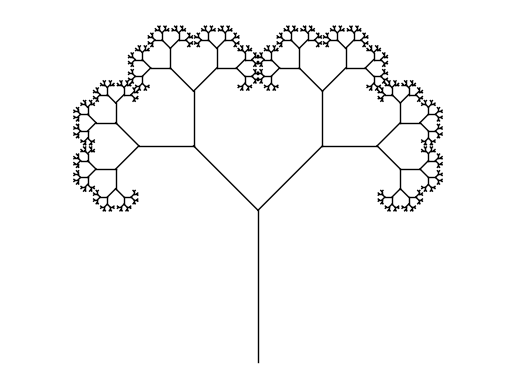

In [28]:
import matplotlib.pyplot as plt
import math


def draw_tree(ax, x, y, angle, length, level):
# x - współrzędna x-owa początkowego punktu 
# y - współrzędna y-owa początkowego punkty.
# angle - kąt, pod którym rysowana jest aktualna gałąź drzewa względem osi poziomej
# length - długość dziecka względem rodzica.
# level - ilość iteracji

    if level == 0:
        return
    else:
        x_new = x + length * math.cos(math.radians(angle))
        y_new = y + length * math.sin(math.radians(angle))
        ax.plot([x, x_new], [y, y_new], 'k-', lw=1)
        
        draw_tree(ax, x_new, y_new, angle - 45, length * 0.6, level-1)
        draw_tree(ax, x_new, y_new, angle + 45, length * 0.6, level-1)

fig, ax = plt.subplots()
ax.axis('equal')
ax.axis('off')
draw_tree(ax, 0, 0, 90, 5, 10)

plt.show()

# Modyfikacje klasycznego drzewa binarnego
 
Poniżej przedstawiono wizualizacje różnych modyfikacji fraktala drzewa binarnego wraz z przykładową implementacją. Wprowadzone modyfikacje obejmują:
1. **Klasyczne drzewo binarne z kątem większym niż $90^\circ$** - eksperymentowanie z kątem pomiędzy gałęziami.
2. **Asymetryczne drzewo smocze** - nierównomierne rozgałęzienia poprzez modyfikację długości i kąta.
3. **H-drzewo** - kształt uzyskany poprzez odpowiednie dobranie proporcji i kąta.
4. **Fraktal drzewa binarnego z kolorowaniem gałęzi** - kolor gałęzi zmienia się w zależności od długości segmentu.
5. **Drzewo Pitagorasa** - wariant fraktala, w którym gałęzie zastąpiono kwadratami.

### Klasyczne drzewo binarne z kątem większym niż $90^\circ$

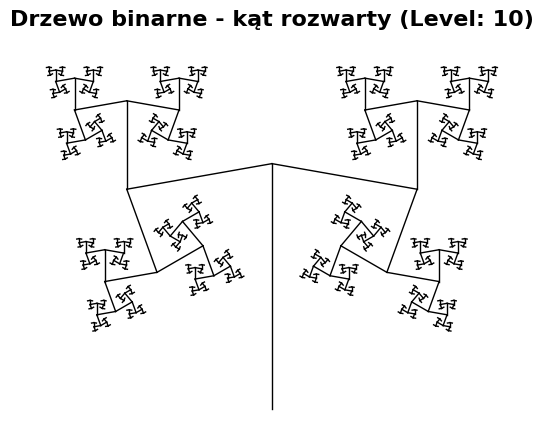

In [ ]:
import matplotlib.pyplot as plt
import math


def draw_tree(ax, x, y, angle, length, level):
# x - współrzędna x-owa początkowego punktu 
# y - współrzędna y-owa początkowego punkty.
# angle - kąt, pod którym rysowana jest aktualna gałąź drzewa względem osi poziomej
# length - długość dziecka względem rodzica.
# level - ilość iteracji

    if level == 0:
        return
    else:
        x_new = x + length * math.cos(math.radians(angle))
        y_new = y + length * math.sin(math.radians(angle))
        ax.plot([x, x_new], [y, y_new], 'k-', lw=1)
        
        draw_tree(ax, x_new, y_new, angle - 100, length * 0.6, level-1)
        draw_tree(ax, x_new, y_new, angle + 100, length * 0.6, level-1)

fig, ax = plt.subplots()
ax.axis('equal')
ax.axis('off')
max_level = 10
draw_tree(ax, 0, 0, 90, 5, max_level)

plt.title(f'Drzewo binarne - kąt rozwarty (Level: {max_level})', fontsize=16, fontweight='bold', pad=20)
plt.show()

### Asymetryczne drzewo smocze

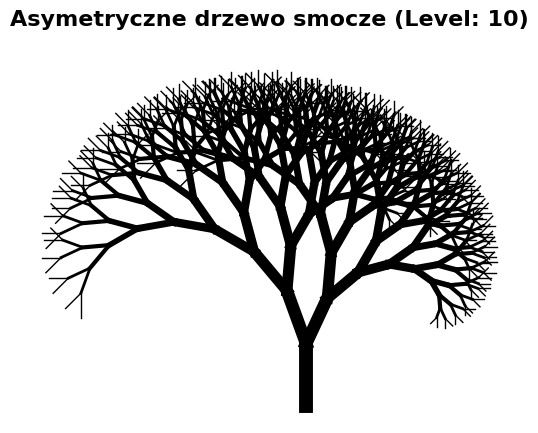

In [ ]:

def draw_tree(ax, x, y, angle, length, level, max_length):
# x - współrzędna x-owa początkowego punktu 
# y - współrzędna y-owa początkowego punkty.
# angle - kąt, pod którym rysowana jest aktualna gałąź drzewa względem osi poziomej
# length - długość dziecka względem rodzica.
# level - ilość iteracji

    if level == 0:
        return
    else:
        x_new = x + length * math.cos(math.radians(angle))
        y_new = y + length * math.sin(math.radians(angle))

        ax.plot([x, x_new], [y, y_new], 'k-', lw=level)
        
        draw_tree(ax, x_new, y_new, angle - 25, length * 0.8, level-1, max_length)
        draw_tree(ax, x_new, y_new, angle + 20, length * 0.9, level-1, max_length)

fig, ax = plt.subplots()
ax.axis('equal')
ax.axis('off')
max_level = 10
draw_tree(ax, 0, 0, 90, 5, max_level, 5)

plt.title(f'Asymetryczne drzewo smocze (Level: {max_level})', fontsize=16, fontweight='bold', pad=20)
plt.show()

### H-drzewo

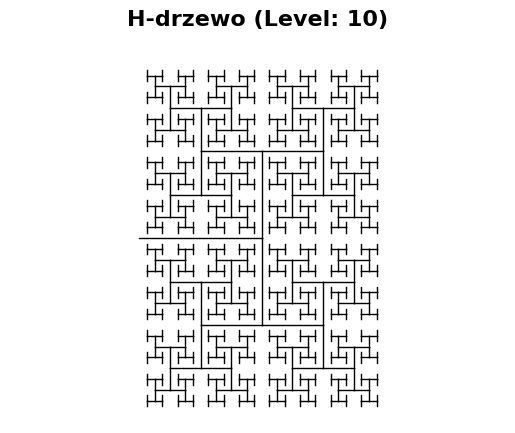

In [ ]:
import matplotlib.pyplot as plt
import math


def draw_tree(ax, x, y, angle, length, level):
# x - współrzędna x-owa początkowego punktu 
# y - współrzędna y-owa początkowego punkty.
# angle - kąt, pod którym rysowana jest aktualna gałąź drzewa względem osi poziomej
# length - długość dziecka względem rodzica.
# level - ilość iteracji

    if level == 0:
        return
    else:
        x_new = x + length * math.cos(math.radians(angle))
        y_new = y + length * math.sin(math.radians(angle))
        ax.plot([x, x_new], [y, y_new], 'k-', lw=1)
        
        draw_tree(ax, x_new, y_new, angle - 90, length / math.sqrt(2), level-1)
        draw_tree(ax, x_new, y_new, angle + 90, length / math.sqrt(2), level-1)

fig, ax = plt.subplots()
ax.axis('equal')
ax.axis('off')
max_level = 10
draw_tree(ax, 0, 0, 0, 5, max_level)

plt.title(f'H-drzewo (Level: {max_level})', fontsize=16, fontweight='bold', pad=20)
plt.show()

### Fraktal drzewa binarnego z kolorowaniem gałęzi

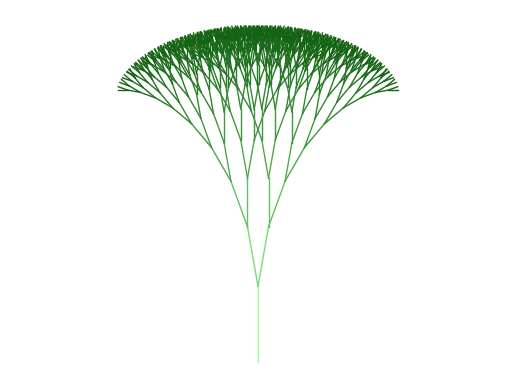

In [ ]:
import matplotlib.pyplot as plt
import math


def draw_tree(ax, x, y, angle, length, level, max_length):
# x - współrzędna x-owa początkowego punktu 
# y - współrzędna y-owa początkowego punkty.
# angle - kąt, pod którym rysowana jest aktualna gałąź drzewa względem osi poziomej
# length - długość dziecka względem rodzica.
# level - ilość iteracji

    if level == 0:
        return
    else:
        x_new = x + length * math.cos(math.radians(angle))
        y_new = y + length * math.sin(math.radians(angle))
        
        t = length / max_length
        r = t*0.6 + (1-t)*0
        g = t*1 + (1-t)*0.3
        b = t*0.6 + (1-t)*0
        color = (r, g, b)


        ax.plot([x, x_new], [y, y_new], color=color, lw=1)

        
        draw_tree(ax, x_new, y_new, angle - 10, length * 0.8, level-1, max_length)
        draw_tree(ax, x_new, y_new, angle + 10, length * 0.8, level-1, max_length)

fig, ax = plt.subplots()
ax.axis('equal')
ax.axis('off')
max_level = 10
draw_tree(ax, 0, 0, 90, 5, max_level, 5)

plt.show()


### Drzewo Pitagorasa

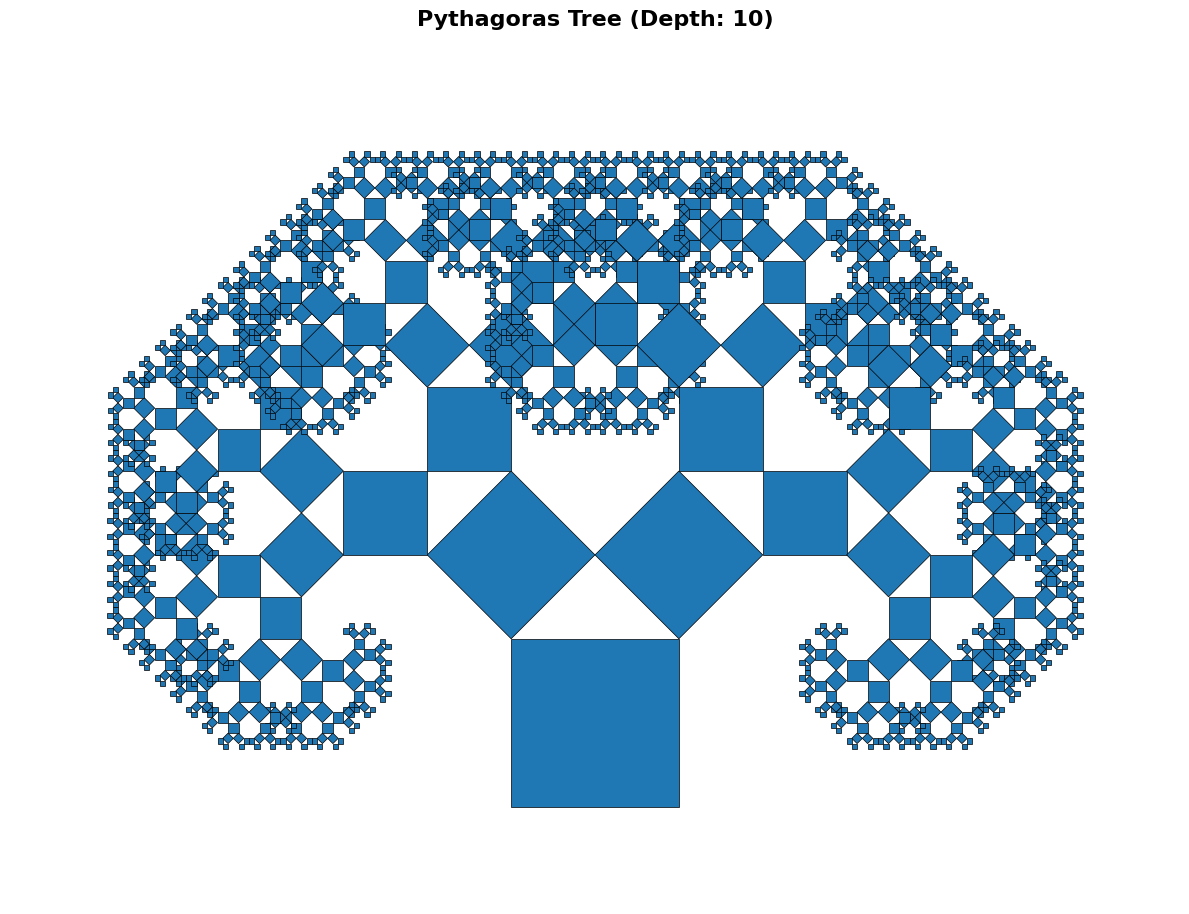

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def draw_square(ax, bottom_left, side_length, angle, level, max_level, bounds):
    # bottom_left - współrzędne dolnego-lewego wierzchołka aktualnego kwadratu (x, y)
    # side_length - długość boku aktualnego kwadratu
    # angle - kąt obrotu kwadratu względem osi X (w radianach)
    # depth - aktualny poziom rekursji
    # max_depth - maksymalny poziom rekursji
    # bounds - słownik do śledzenia minimalnych i maksymalnych wartości x i y (do dopasowania wykresu)

    if level > max_level:
        return
    
    # Wierzchołki kwadratu w lokalnym układzie współrzędnych
    x, y = bottom_left
    corners = np.array([
        [0, 0],                  # dolny-lewy
        [side_length, 0],        # dolny-prawy
        [side_length, side_length], # górny-prawy
        [0, side_length]         # górny-lewy
    ])
    
    # Tworzymy macierz rotacji kwadratu
    cos_a, sin_a = np.cos(angle), np.sin(angle)
    R = np.array([[cos_a, -sin_a], [sin_a, cos_a]])
    
    # Obracamy i przesuwamy wierzchołki do układu globalnego
    rotated = corners @ R.T + np.array([x, y])
    
    # Aktualizujemy granice drzewa, żeby dopasować wykres
    bounds['min_x'] = min(bounds['min_x'], rotated[:, 0].min())
    bounds['max_x'] = max(bounds['max_x'], rotated[:, 0].max())
    bounds['min_y'] = min(bounds['min_y'], rotated[:, 1].min())
    bounds['max_y'] = max(bounds['max_y'], rotated[:, 1].max())
    
    # Rysujemy kwadrat (czarna krawędź, bez wypełnienia)
    square = patches.Polygon(rotated, edgecolor='black', linewidth=0.5)
    ax.add_patch(square)
    
    # Górne wierzchołki kwadratu (potrzebne do wyznaczenia dzieci)
    top_left = rotated[3]
    top_right = rotated[2]
    
    # Obliczamy wierzchołek trójkąta prostokątnego na górnej krawędzi
    mid_top = (top_left + top_right) / 2
    perp = np.array([-(top_right[1]-top_left[1]), top_right[0]-top_left[0]])
    perp = perp / np.linalg.norm(perp)
    apex = mid_top + perp * (side_length / 2)
    
    # Nowa długość boku dla dzieci (kwadraty po 45 stopniach)
    new_side = side_length / np.sqrt(2)
    
    # LEWY kwadrat: dolny-lewy wierzchołek = top_left, kąt = w kierunku apex
    left_edge = apex - top_left
    left_angle = np.arctan2(left_edge[1], left_edge[0])
    draw_square(ax, top_left, new_side, left_angle, level + 1, max_level, bounds)
    
    # PRAWY kwadrat: dolny-lewy wierzchołek = apex, kąt = w kierunku top_right
    right_edge = top_right - apex
    right_angle = np.arctan2(right_edge[1], right_edge[0])
    draw_square(ax, apex, new_side, right_angle, level + 1, max_level, bounds)

def create_pythagoras_tree(max_level=10, initial_size=1):
    # Tworzymy wykres
    fig, ax = plt.subplots(1, 1, figsize=(12, 12))
    ax.set_aspect('equal')
    ax.axis('off')
    
    # Początkowy kwadrat na dole, wyśrodkowany
    start_x = -initial_size / 2
    start_y = 0
    
    # Słownik do śledzenia granic drzewa (min/max x i y)
    bounds = {
        'min_x': float('inf'),
        'max_x': float('-inf'),
        'min_y': float('inf'),
        'max_y': float('-inf')
    }
    
    # Rysujemy drzewo Pythagorasa
    draw_square(ax, (start_x, start_y), initial_size, 0, 0, max_level, bounds)
    
    # Obliczamy margines, żeby drzewo mieściło się na wykresie
    width = bounds['max_x'] - bounds['min_x']
    height = bounds['max_y'] - bounds['min_y']
    margin = max(width, height) * 0.1
    
    # Ustawiamy granice wykresu z marginesem
    ax.set_xlim(bounds['min_x'] - margin, bounds['max_x'] + margin)
    ax.set_ylim(bounds['min_y'] - margin, bounds['max_y'] + margin)
    
    plt.title(f'Pythagoras Tree (Level: {max_level})', fontsize=16, fontweight='bold', pad=20)
    plt.tight_layout()
    plt.show()

create_pythagoras_tree(max_level=10, initial_size=1)


# Wpływ parametrów drzewa binarnego na wymiar Mińkowskiego

W ramach eksperymentu zbadano, jak zmienia się wymiar Mińkowskiego drzewa binarnego w zależności od wybranych parametrów:
- **grubość gałęzi** - wpływ szerokości linii rysującej gałąź na oszacowany wymiar fraktala,  
- **kąt między gałęziami** - wpływ kąta odchylenia dzieci względem osi rodzica.  

Poniżej przedstawiono wspólne funkcje wykorzystywane w obu eksperymentach do generowania drzewa i obliczania wymiaru Mińkowskiego.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Funkcja rysująca drzewo binarne
def draw_tree(ax, x, y, length, angle, depth, max_depth,
              scale, thickness):
    """
    Rekurencyjne rysowanie drzewa binarnego.
    
    Parametry:
    - ax: obiekt matplotlib.axes do rysowania
    - x, y: współrzędne początku aktualnej gałęzi
    - length: długość aktualnej gałęzi
    - angle: kąt kierunku gałęzi w radianach
    - depth: aktualny poziom rekursji
    - max_depth: maksymalny poziom rekursji
    - scale: współczynnik skracania długości gałęzi dla dzieci
    - thickness: grubość linii gałęzi
    """

    if depth > max_depth:
        return

    # Końcowy punkt gałęzi w układzie kartezjańskim
    x2 = x + length * math.cos(angle)
    y2 = y + length * math.sin(angle)

    # Gałąź jako odcinek między (x, y) a (x2, y2)
    ax.plot([x, x2], [y, y2], color='black', linewidth=thickness)

    if depth < max_depth:
        new_length = length * scale 
        draw_tree(ax, x2, y2, new_length, angle + branch_angle, depth+1, max_depth, scale, thickness)
        draw_tree(ax, x2, y2, new_length, angle - branch_angle, depth+1, max_depth, scale, thickness)

# Funkcja rasteryzująca drzewo na tablicę NumPy
def rasterize_tree(depth=7, scale=0.6, thickness=2,
                   angle_deg=30, resolution=512):
    """
    Generuje obraz binarny drzewa binarnego do analizy fraktalnej.

    Parametry:
    - depth: maksymalny poziom rekursji
    - scale: współczynnik skracania długości gałęzi
    - thickness: grubość linii gałęzi
    - angle_deg: kąt między gałęziami w stopniach
    - resolution: rozdzielczość obrazu w pikselach
    """

    global branch_angle
    branch_angle = math.radians(angle_deg)

    # Tworzenie obiektu matplotlib
    fig, ax = plt.subplots(figsize=(5,5), dpi=resolution//5)
    ax.set_xlim(-1,1)
    ax.set_ylim(0,1.5)
    ax.axis('off') 

    # Rysowanie drzewa
    draw_tree(ax, 0, 0, 0.5, math.pi/2, 0, depth, scale, thickness)

    # Rasteryzacja figury do tablicy NumPy
    fig.canvas.draw()
    buf = np.asarray(fig.canvas.buffer_rgba())[:,:,:3].copy()
    plt.close(fig)

    # Konwersja na obraz binarny (True = gałąź, False = tło)
    binary = np.mean(buf, axis=2) < 128
    return binary

# Funkcja licząca wymiar Minkowskiego metodą box-counting
def box_counting_dimension(image, min_box_size=1, max_box_size=None):
    """
    Oblicza wymiar fraktalny (Minkowskiego) obrazu binarnego.

    Parametry:
    - image: obraz binarny
    - min_box_size: minimalny rozmiar pudełka
    - max_box_size: maksymalny rozmiar pudełka
    """

    if max_box_size is None:
        max_box_size = min(image.shape)//4

    box_sizes = []
    counts = []
    size = min_box_size
    while size <= max_box_size:
        box_sizes.append(size)
        size *= 2

    # Dla każdego rozmiaru pudełka liczymy liczbę zajętych pudełek
    for box_size in box_sizes:
        count = 0
        for i in range(0, image.shape[0], box_size):
            for j in range(0, image.shape[1], box_size):
                box = image[i:i+box_size, j:j+box_size]
                if np.any(box):
                    count += 1
        counts.append(count)

    log_sizes = np.log(box_sizes)
    log_counts = np.log(counts)

    # Wyznaczanie wymiaru fraktalnego jako nachylenie prostej
    coeffs = np.polyfit(log_sizes, log_counts, 1)
    dimension = -coeffs[0] 

    return dimension


### Wyniki dla zmiennej grubości gałęzi drzewa

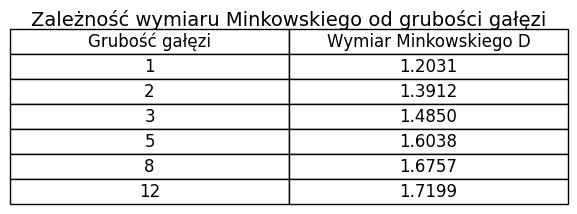

In [40]:
# Lista wartości grubości gałęzi, które chcemy przetestować
thickness_values = [1, 2, 3, 5, 8, 12]

# Parametry drzewa
depth = 7        
scale = 0.6      
angle_deg = 45  
resolution = 512 

results = []

for t in thickness_values:
    tree_img = rasterize_tree(depth=depth, scale=scale, thickness=t, angle_deg=angle_deg, resolution=resolution)
    
    # Obliczenie wymiaru Minkowskiego dla wygenerowanego obrazu
    D = box_counting_dimension(tree_img)
    
    results.append((t, D))

# Wizualizacja wyników w formie tabeli
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off') 

table_data = [[str(t), f"{D:.4f}"] for t, D in results]
column_labels = ["Grubość gałęzi", "Wymiar Minkowskiego D"]

table = ax.table(cellText=table_data,   
                 colLabels=column_labels,
                 cellLoc='center',       
                 loc='center')          

table.auto_set_font_size(False) 
table.set_fontsize(12)          
table.scale(1.2, 1.5)          

plt.title("Zależność wymiaru Minkowskiego od grubości gałęzi", fontsize=14, pad=10)

plt.show()


### Wyniki dla zmian kąta

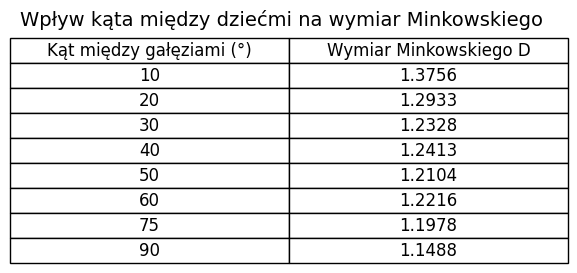

In [39]:
# Lista wartości kątów między gałęziami, które chcemy przetestować
angle_values = [10, 20, 30, 40, 50, 60, 75, 90] 

# Parametry drzewa
depth = 7         
scale = 0.6      
thickness = 1   
resolution = 512 

results = []

for angle in angle_values:
    tree_img = rasterize_tree(depth=depth, scale=scale, thickness=thickness,
                              angle_deg=angle, resolution=resolution)
    
    # Obliczenie wymiaru Minkowskiego dla wygenerowanego obrazu
    D = box_counting_dimension(tree_img)
    
    results.append((angle, D))

# Wizualizacja wyników w formie tabeli
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off') 

table_data = [[str(angle), f"{D:.4f}"] for angle, D in results]
column_labels = ["Kąt między gałęziami (°)", "Wymiar Minkowskiego D"]

table = ax.table(cellText=table_data,  
                 colLabels=column_labels, 
                 cellLoc='center',       
                 loc='center')          

table.auto_set_font_size(False) 
table.set_fontsize(12)          
table.scale(1.2, 1.5)           

plt.suptitle("Wpływ kąta między dziećmi na wymiar Minkowskiego", fontsize=14, y=1.2)

plt.show()


# Wnioski
Drzewa binarne to bardzo rozległa klasa fraktali. Część z nich w żadnym stopniu nie przypomina podstawowego drzewa binarnego (zwłaszcza gdy podany kąt między dziećmi zbliża się bądź przekracza 180 stopni). Dodatkowo, aby zaobserwować skomplikowaną strukturę fraktala oraz jego szczegóły powinno się stosować stosunkowo wysokie ratio (pomiędzy 0,9 a 1), ponieważ w innym przypadku długości odcinków bardzo szybko się zmniejszają, a ekran komputera nie jest w stanie wyrenderować szczegółów. Mimo prostego algorytmu implementacji, czas wykonania programu rośnie bardzo szybko wraz z ilością zejść rekurencyjnych, przy 15 poziomach rekurencji na wynik czeka się bardzo długo, a przy 10 fraktal powstaje natychmiast.

Drzewa binarne to rozległa klasa fraktali. Część z nich w żadnym stopniu nie przypomina klasycznego drzewa binarnego, szczególnie gdy kąt między dziećmi zbliża się do lub przekracza 180 stopi. Wpływ parametrów jest znaczący:
- Kąt rozgałęzień - większe kąty powodują szersze, bardziej rozgałęzione drzewo, natomiast mniejsze kąty tworzą wąskie, pionowe struktury.
- Asymetria - wprowadzenie różnych długości lewej i prawej gałęzi (drzewo smocze) daje ciekawe, nierównomierne kształty, które mogą przypominać naturalne gałęzie.
- H-drzewo - ustawienie kątów i proporcji na odpowiednie wartości pozwala uzyskać charakterystyczny, geometryczny kształt litery „H”, pokazując, że zmiana parametrów może całkowicie zmienić wygląd fraktala.
- Kolorowanie gałęzi - zmiana koloru w zależności od długości sprawia, że fraktal bardziej przypomina naturalne drzewo oraz pozwala lepiej obserwować strukturę oraz hierarchię gałęzi.
- Drzewo Pitagorasa - zastąpienie gałęzi kwadratami tworzy klasyczny fraktal geometryczny

Aby zaobserwować szczegóły fraktala, warto stosować stosunkowo wysokie ratio (pomiędzy 0,9 a 1), ponieważ w innym przypadku długości odcinków bardzo szybko maleją, a ekran komputera nie jest w stanie wyrenderować szczegółów. Mimo prostego algorytmu implementacji, czas wykonania programu rośnie bardzo szybko wraz z ilością poziomów rekursji. Przy 15 poziomach rekurencji czas oczekiwania jest znaczący, natomiast przy 10 poziomach fraktal powstaje niemal natychmiast.

W kontekście obliczeń wymiaru Mińkowskiego warto pamiętać, że wykorzystana metoda oparta na rasteryzacji wprowadza przybliżenia, które mogą wpływać na dokładność wyników, jednak ogólna tendencja pozostaje widoczna. Grubość gałęzi ma istotny wpływ na oszacowany wymiar - szersze linie zajmują więcej pikseli i w efekcie wypełniają większą część przestrzeni, co prowadzi do wyższego wymiaru Mińkowskiego w porównaniu do teoretycznego wymiaru cienkiej, idealnej struktury. Podobnie kąt między dziećmi zmienia sposób nachodzenia się gałęzi: większe kąty powodują szersze, bardziej rozgałęzione drzewo z mniejszym nakładaniem się odcinków, natomiast mniejsze kąty skutkują częstym zachodzeniem gałęzi na siebie, zwiększając gęstość fraktala. W rezultacie zarówno grubość gałęzi, jak i kąt rozgałęzień mają bezpośredni wpływ na to, ile przestrzeni zajmuje fraktal, a tym samym na wartość wymiaru Mińkowskiego.